<a href="https://colab.research.google.com/github/soffiyahabass1/Machine-learning-Projects/blob/main/PCOS_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



## Get data from drive


In [ ]:
pcos_dataset = pd.read_csv("/content/drive/MyDrive/pcos/pcos_dataset.csv")
pcos_dataset.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


## Data Inspection


In [ ]:
pcos_dataset.describe(

)

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


In [ ]:
pcos_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


## Exploratory Data Analysis

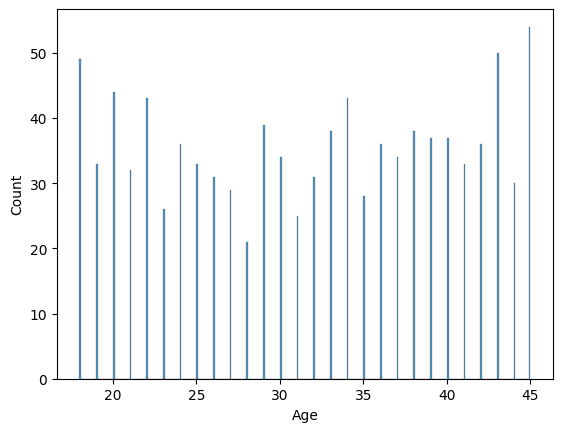

In [ ]:
sns.histplot(data=pcos_dataset, x = "Age", binwidth= .1)
plt.show()

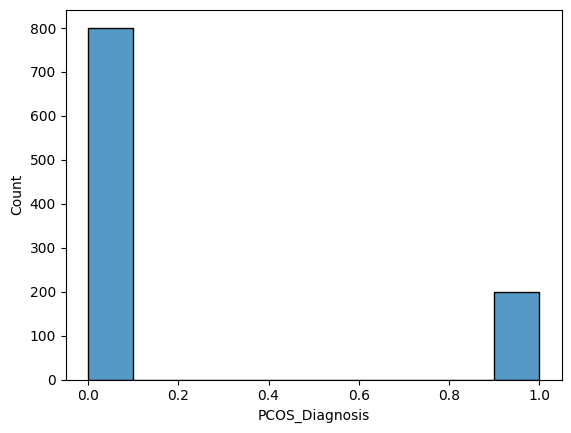

In [ ]:
sns.histplot(data=pcos_dataset, x = "PCOS_Diagnosis", binwidth= .1)
plt.show()

In [ ]:
pcos_dataset.isnull().sum()

,0
Age,0
BMI,0
Menstrual_Irregularity,0
Testosterone_Level(ng/dL),0
Antral_Follicle_Count,0
PCOS_Diagnosis,0


In [ ]:
pcos_dataset.agg(["mean", "std"])

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448


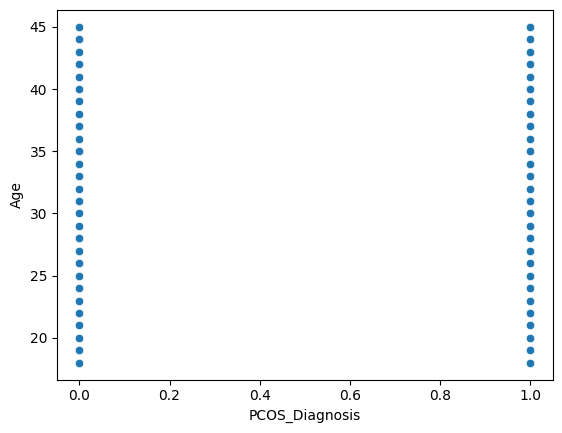

In [ ]:
sns.scatterplot(data=pcos_dataset,  y ="Age", x ="PCOS_Diagnosis")

plt.show()

In [ ]:
print(pcos_dataset.select_dtypes("object"). head())

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


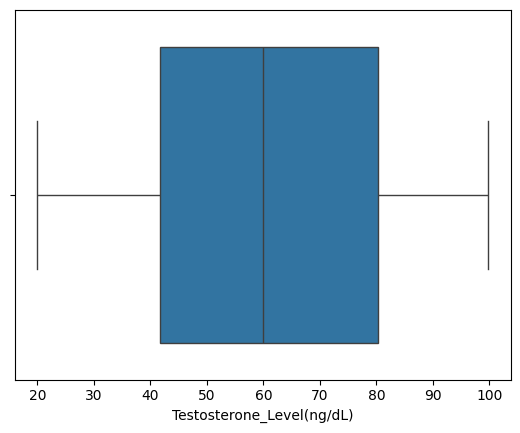

In [ ]:
sns.boxplot(data=pcos_dataset, x="Testosterone_Level(ng/dL)")
plt.show()

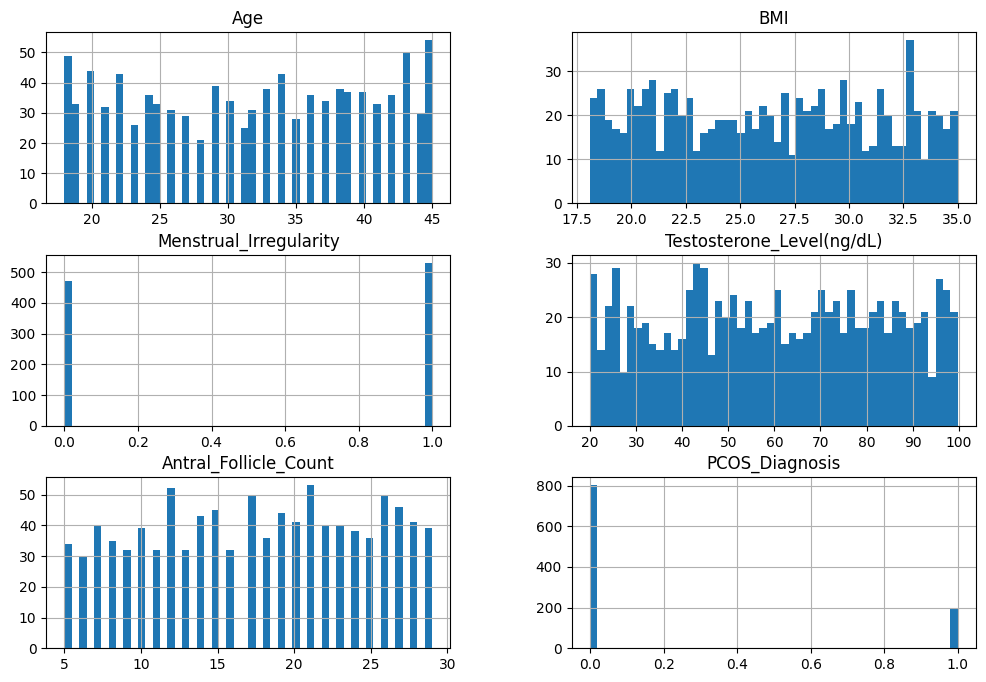

In [ ]:
import matplotlib.pyplot as plt
pcos_dataset.hist(bins=50, figsize=(12, 8))
plt.show()

In [ ]:
import numpy as np
def shuffle_and_split_data(data, test_ratio):
   shuffled_indices = np.random.permutation(len(data))
   test_set_size = int(len(data) * test_ratio)
   test_indices = shuffled_indices[:test_set_size]
   train_indices = shuffled_indices[test_set_size:]
   return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set,test_set = shuffle_and_split_data(pcos_dataset, 0.2)
len(train_set), len(test_set)

(800, 200)

In [ ]:
 corr_matrix = pcos_dataset.corr()

In [ ]:
corr_matrix["PCOS_Diagnosis"].sort_values(ascending=False)

,PCOS_Diagnosis
PCOS_Diagnosis,1.000000
Menstrual_Irregularity,0.469376
BMI,0.377852
Testosterone_Level(ng/dL),0.200817
Antral_Follicle_Count,0.192014
Age,-0.064675


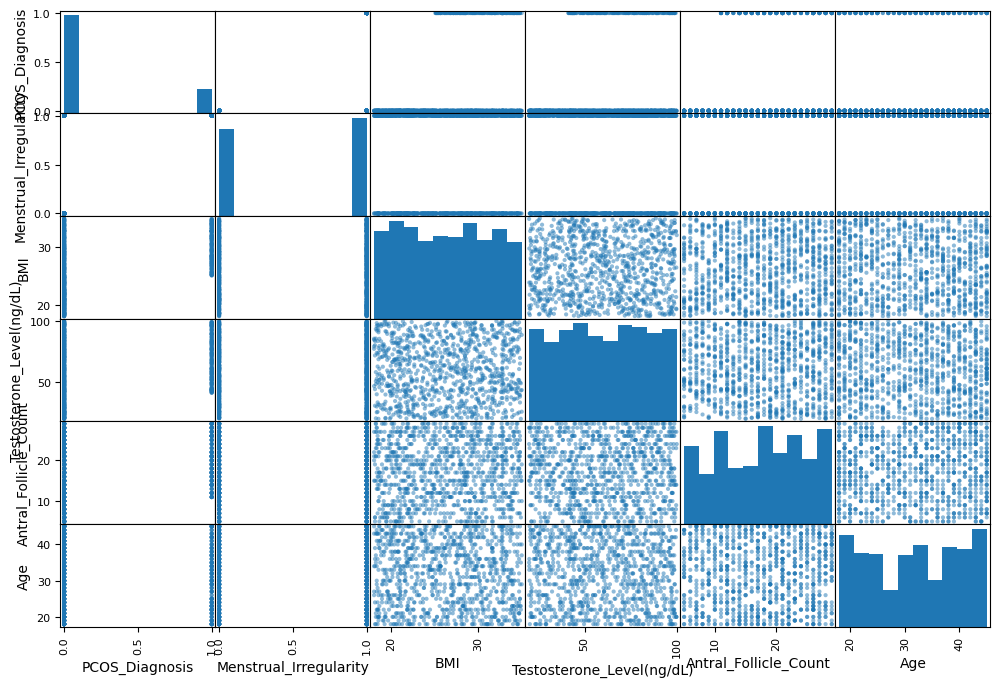

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["PCOS_Diagnosis", "Menstrual_Irregularity", "BMI",
 "Testosterone_Level(ng/dL)","Antral_Follicle_Count","Age" ]
scatter_matrix(pcos_dataset[attributes], figsize=(12, 8))
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
pcos_num_std_scaled = std_scaler.fit_transform(pcos_dataset)

In [ ]:
train_set.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
346,41,27.2,0,96.5,19,0
60,43,23.5,1,63.3,18,0
200,23,27.2,1,48.9,29,1
662,41,32.4,0,31.3,16,0
503,22,34.1,1,66.9,26,1


In [ ]:
test_set.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
951,29,30.2,1,80.1,24,1
811,28,20.9,0,81.7,24,0
713,38,31.6,0,55.0,16,0
332,44,25.0,0,22.2,19,0
528,41,20.6,1,25.0,24,0


In [ ]:
X = pcos_dataset.drop("PCOS_Diagnosis", axis=1)
y = pcos_dataset["PCOS_Diagnosis"].copy()



## Model Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = X[:800], X[800:],y[:800],y[800:]


In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)


SGDClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train,cv=3, scoring="accuracy")

array([0.80898876, 0.23970037, 0.80827068])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    # Use .iloc to select rows based on indices
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train.iloc[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.8352059925093633
0.8089887640449438
0.8082706766917294


In [ ]:
print(sgd_clf.score(X_test, y_test))

0.8


## Model Evaluation


In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train,y_train,cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[421, 226],
       [ 79,  74]])

In [ ]:
from sklearn.metrics import precision_score,recall_score, f1_score
precision_score(y_train,y_train_pred)

0.24666666666666667

In [ ]:
recall_score(y_train,y_train_pred)

0.48366013071895425

In [ ]:
f1_score(y_train,y_train_pred)

0.32671081677704195

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd2 = SGDClassifier(loss='log_loss', max_iter=1000, learning_rate='optimal', eta0=0.01,penalty='elasticnet', alpha=0.0001, l1_ratio=0.15)


In [ ]:
sgd2.fit(X_train, y_train)

SGDClassifier(eta0=0.01, loss='log_loss', penalty='elasticnet')

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd2,X_train,y_train,cv=3, scoring="accuracy")

array([0.31460674, 0.80898876, 0.71052632])

In [ ]:
print(sgd2.score(X_test, y_test))

0.83


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd2)
    # Use .iloc to select rows based on indices
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train.iloc[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.6928838951310862
0.5955056179775281
0.8082706766917294


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=42))
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [ ]:
print(svm_clf.score(X_test, y_test))

0.92


In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, X_train,y_train,cv=3)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[611,  36],
       [ 38, 115]])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_svm = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), LinearSVC(C=10, random_state=42))
poly_svm.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=10, random_state=42))])

In [ ]:
print(poly_svm.score(X_test, y_test))

0.97


In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(poly_svm, X_train,y_train,cv=3)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[633,  14],
       [ 12, 141]])

In [ ]:
from sklearn.metrics import precision_score,recall_score, f1_score
precision_score(y_train,y_train_pred)

0.9096774193548387

In [ ]:
recall_score(y_train,y_train_pred)

0.9215686274509803

In [ ]:
from sklearn.metrics import precision_recall_curve, classification_report, accuracy_score

y_test_pred = poly_svm.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       154
           1       0.93      0.93      0.93        46

    accuracy                           0.97       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.97      0.97       200

Accuracy: 0.97


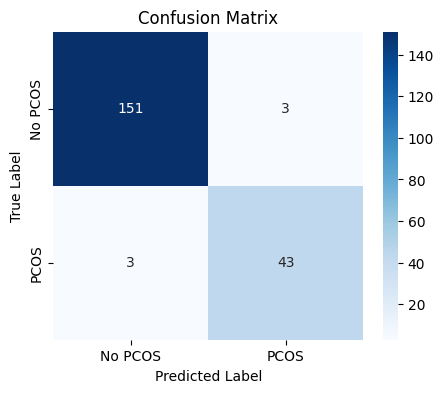

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_test_pred)


plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No PCOS", "PCOS"], yticklabels=["No PCOS", "PCOS"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


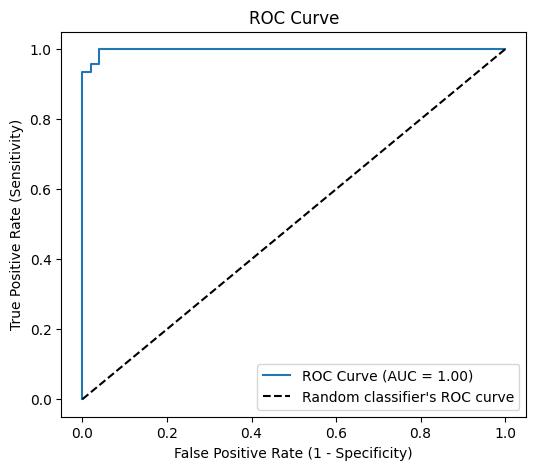

AUC Score: 0.9978825522303783


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve


y_scores = poly_svm.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_scores)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random classifier's ROC curve")  # Diagonal line (random guess)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC Score:", auc_score)


In [ ]:
import joblib

joblib.dump(poly_svm, "pcos_classifier.pkl")  # Save model


['pcos_classifier.pkl']

In [ ]:
model = joblib.load("pcos_classifier.pkl")


In [ ]:
 from sklearn.metrics import precision_recall_curve
 precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred)

In [ ]:
idx_for_recall = (recall >=0.99).argmax()
threshold = thresholds[idx_for_recall]
threshold

np.int64(0)

In [ ]:
y_train_pred_99 = (y_train_pred >= threshold)
recall_score(y_train, y_train_pred_99)

1.0

In [ ]:
recall_score(y_test, y_test_pred)

0.9347826086956522

In [ ]:

new_threshold = 0.3

y_test_pred_new = (y_scores >= new_threshold).astype(int)


from sklearn.metrics import classification_report, accuracy_score

print("New Classification Report:\n", classification_report(y_test, y_test_pred_new))
print("New Accuracy:", accuracy_score(y_test, y_test_pred_new))


New Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       154
           1       1.00      0.87      0.93        46

    accuracy                           0.97       200
   macro avg       0.98      0.93      0.96       200
weighted avg       0.97      0.97      0.97       200

New Accuracy: 0.97


In [ ]:
recall_score(y_test, y_test_pred_new)

0.8695652173913043